In [ ]:
#Primer Paso: Instalar librerias
#pip install geopandas matplotlib

Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3


Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_1.geojson: LineString    100
Name: count, dtype: int64
Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_2.geojson: LineString    100
Name: count, dtype: int64
Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_3.geojson: LineString    100
Name: count, dtype: int64
Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_4.geojson: LineString    100
Name

Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3


Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_5.geojson: LineString    100
Name: count, dtype: int64
Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_6.geojson: LineString    100
Name: count, dtype: int64
Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_7.geojson: LineString    100
Name: count, dtype: int64
Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_8.geojson: LineString    100
Name

Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3


Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_9.geojson: LineString    100
Name: count, dtype: int64
Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_10.geojson: LineString    83
Name: count, dtype: int64
Proyección del archivo después de reproyectar: EPSG:32719


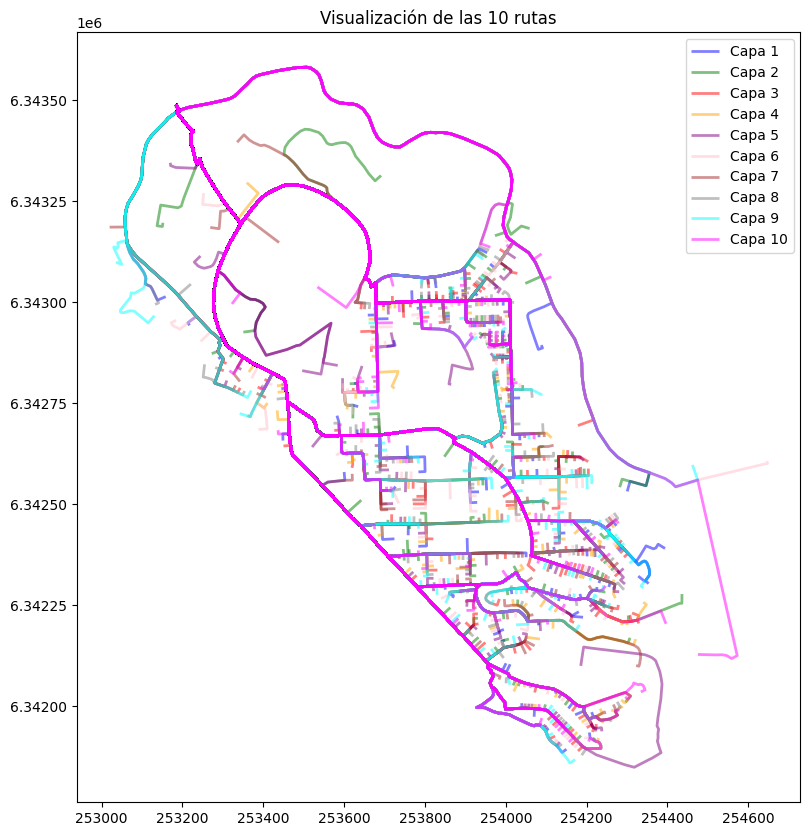

In [ ]:
## Visualización de las 10 capas

import geopandas as gpd
import matplotlib.pyplot as plt

# Definir el tamaño del buffer (ajustar según sea necesario)
BUFFER_SIZE = 0.00001  # Aproximadamente 1 metro si está en grados (EPSG:4326)

# Función para cargar líneas y filtrar problemas
def cargar_lineas(ruta):
    try:
        gdf = gpd.read_file(ruta)

        # Mostrar los tipos de geometría para depurar
        tipos_geometria = gdf.geometry.type.value_counts()
        print(f"Tipos de geometría en {ruta}: {tipos_geometria}")

        # Filtrar solo geometrías de tipo LineString
        gdf = gdf[gdf.geometry.type == 'LineString']

        # Eliminar cualquier columna que no sea espacial (si hay más campos no geoespaciales)
        columnas_validas = ['geometry']
        gdf = gdf[columnas_validas]

        # Verificar si las geometrías son válidas
        if not gdf.is_valid.all():
            print(f"⚠️ Algunas geometrías no son válidas en {ruta}. Eliminando...")
            gdf = gdf[gdf.is_valid]  # Filtramos las geometrías no válidas

        if gdf.empty:
            print(f"⚠️ {ruta} no contiene líneas válidas.")
            return None

        # Reproyectar a EPSG:32719 (UTM zona 19S, por ejemplo)
        gdf = gdf.to_crs(epsg=32719)

        # Verificar la proyección
        print(f"Proyección del archivo después de reproyectar: {gdf.crs}")

        return gdf

    except Exception as e:
        print(f"❌ Error en {ruta}: {e}")
        return None

# Lista de rutas a los archivos GeoJSON (de rutas_1 a rutas_10)
rutas = [fr'C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_{i}.geojson' for i in range(1, 11)] #se selecciona la carpeta origen de las rutas

# Cargar todas las capas de líneas
gdfs = [cargar_lineas(ruta) for ruta in rutas]

# Filtrar las capas no válidas (None)
gdfs = [gdf for gdf in gdfs if gdf is not None]

# Verificar si se han cargado capas válidas
if not gdfs:
    print("⚠️ No se pudieron cargar las capas correctamente.")
else:
    # Crear un gráfico para visualizar todas las capas juntas
    fig, ax = plt.subplots(figsize=(10, 10))

    # Colores para cada capa
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'brown', 'grey', 'cyan', 'magenta']

    # Graficar cada capa con un color diferente
    for i, gdf in enumerate(gdfs):
        gdf.plot(ax=ax, color=colors[i % len(colors)], alpha=0.5, linewidth=2, label=f'Capa {i+1}')

    plt.title('Visualización de las 10 rutas')
    plt.legend()
    plt.show()

